In [10]:
from google.colab import files
uploaded = files.upload()

Saving test.csv to test (1).csv
Saving train.csv to train (1).csv


In [0]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

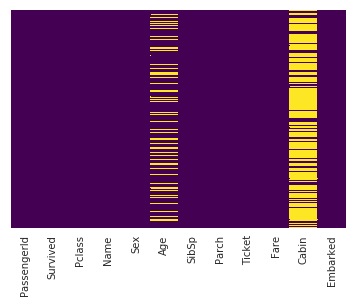

In [12]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

The yellow colored are the missing values 

In [0]:
sns.set_style('whitegrid')


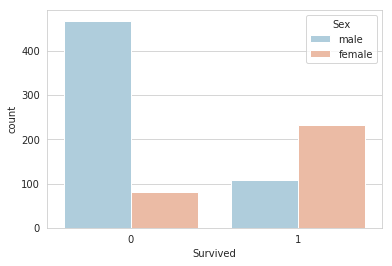

In [17]:
sns.countplot(x='Survived' , hue = 'Sex' , data = train , palette = 'RdBu_r')

Most of the surving members from Titanic where Female :o

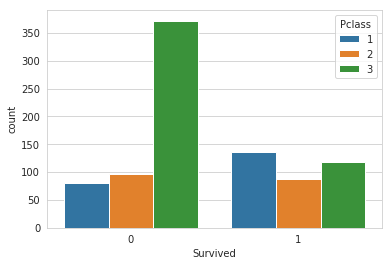

In [19]:
sns.countplot(x='Survived' , hue = 'Pclass' , data = train )

Lower class people did nopt survive compared to the Higher Class people

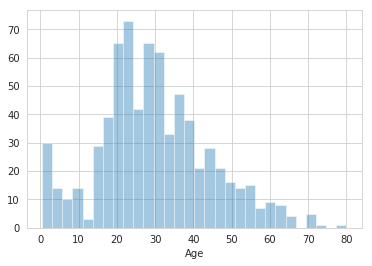

In [20]:
sns.distplot(train['Age'].dropna() , kde = False , bins = 30)

Most passengers where in their 20's

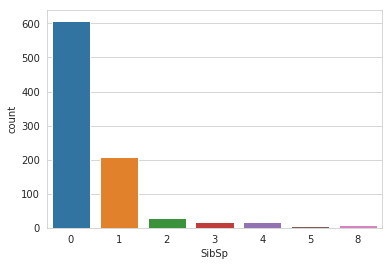

In [21]:
sns.countplot(x='SibSp' , data=train)

Most people where travelling Alone

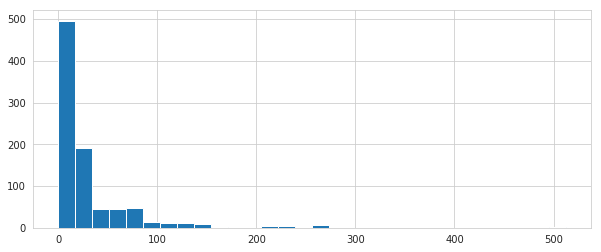

In [24]:
train['Fare'].hist(bins=30 , figsize=(10,4))

Most people had the cheap tickets

Let us start clearning the data

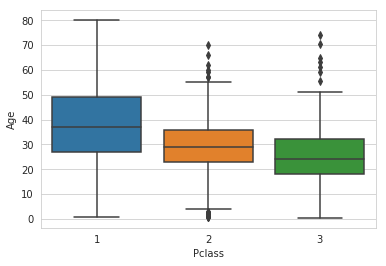

In [26]:
sns.boxplot(x='Pclass', y = 'Age', data=train)

From here we understood that older the person higher class ticket they took

In [0]:
def impute_age(cols):
  Age = cols[0]
  Pclass = cols[1]
  if pd.isnull(Age):
    if Pclass ==1:
      return 37
    elif Pclass ==2:
      return 29
    else:
      return 24
  else:
    return Age

In [0]:
train['Age'] = train[['Age','Pclass']].apply(impute_age , axis=1)

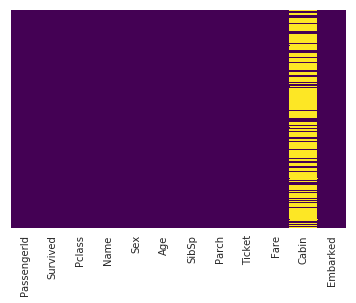

In [31]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

We filled up the missing age values as you can see . However I think cabins is too much of a hassle so I will drop the cabin column.

In [0]:
train.drop('Cabin' , axis = 1 , inplace = True)

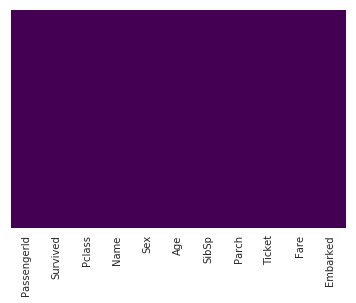

In [33]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

We dont have a cabin now so no missing values now.

In [34]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


Here our model wont take the Sex as male and female we will use 1 & 0

In [0]:
sex = pd.get_dummies(train['Sex'] , drop_first= True)

In [0]:
embark = pd.get_dummies(train['Embarked'] , drop_first = True)

In [0]:
train = pd.concat([train,sex,embark] , axis = 1)

In [39]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


we got new colums now lets drop the non useful data

In [0]:
train.drop(['Sex','Embarked' ,'Name' , "Ticket"] , axis =1 , inplace=True)

In [0]:
train.drop('PassengerId',axis =1 , inplace = True)

In [43]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [0]:
X = train.drop('Survived' , axis = 1)
y = train['Survived']

In [0]:
from sklearn.model_selection import  train_test_split

In [0]:
X_train , X_test , y_train , y_test = train_test_split(X,y , test_size = 0.3 , random_state = 101)

In [0]:
from sklearn.linear_model import LogisticRegression

In [0]:
logmodel = LogisticRegression()

In [51]:
logmodel.fit(X_train , y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
predictions = logmodel.predict(X_test)

In [0]:
from sklearn.metrics import classification_report

In [54]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.77      0.86      0.81       154
           1       0.78      0.65      0.71       114

    accuracy                           0.77       268
   macro avg       0.77      0.76      0.76       268
weighted avg       0.77      0.77      0.77       268

